In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

data = pd.read_csv('avocado-updated-2020.csv')
data

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30016,2020-05-17,1.58,2271254.00,150100.00,198457.00,5429.00,1917250.00,1121691.00,795559.00,0.00,organic,2020,Total U.S.
30017,2020-05-17,1.09,8667913.24,2081824.04,1020965.12,33410.85,5531562.87,2580802.48,2817078.77,133681.62,conventional,2020,West
30018,2020-05-17,1.71,384158.00,23455.00,39738.00,1034.00,319932.00,130051.00,189881.00,0.00,organic,2020,West
30019,2020-05-17,0.89,1240709.05,430203.10,126497.28,21104.42,662904.25,395909.35,265177.09,1817.81,conventional,2020,West Tex/New Mexico


In [4]:
avo=data.rename(columns={'date':'Date',
'4046':'4046S',
'4225':'4225L',
'4770':'4770XL', 
'average_price':'AvgPr', 
'total_volume':'TVol', 
'total_bags':'TBags', 
'small_bags':'SBags', 
'large_bags':'LBags',  
'xlarge_bags':'XLBags',
'type':'Type', 
'year':'Year',
'geography':'Location', 
'month':'Month',
'day':'Day'})
avo

,Date,AvgPr,TVol,4046S,4225L,4770XL,TBags,SBags,LBags,XLBags,Type,Year,Location
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30016,2020-05-17,1.58,2271254.00,150100.00,198457.00,5429.00,1917250.00,1121691.00,795559.00,0.00,organic,2020,Total U.S.
30017,2020-05-17,1.09,8667913.24,2081824.04,1020965.12,33410.85,5531562.87,2580802.48,2817078.77,133681.62,conventional,2020,West
30018,2020-05-17,1.71,384158.00,23455.00,39738.00,1034.00,319932.00,130051.00,189881.00,0.00,organic,2020,West
30019,2020-05-17,0.89,1240709.05,430203.10,126497.28,21104.42,662904.25,395909.35,265177.09,1817.81,conventional,2020,West Tex/New Mexico


In [5]:
avo.set_index('Date')

,AvgPr,TVol,4046S,4225L,4770XL,TBags,SBags,LBags,XLBags,Type,Year,Location
Date,,,,,,,,,,,,
2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany
2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany
2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta
2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-17,1.58,2271254.00,150100.00,198457.00,5429.00,1917250.00,1121691.00,795559.00,0.00,organic,2020,Total U.S.
2020-05-17,1.09,8667913.24,2081824.04,1020965.12,33410.85,5531562.87,2580802.48,2817078.77,133681.62,conventional,2020,West
2020-05-17,1.71,384158.00,23455.00,39738.00,1034.00,319932.00,130051.00,189881.00,0.00,organic,2020,West


In [6]:
avo_D= avo.drop(['4046S', '4225L', '4770XL', 'TBags', 'SBags', 'LBags', 'XLBags', 'Type'], axis=1)
avo1= avo_D.set_index('Date')
avo1

,AvgPr,TVol,Year,Location
Date,,,,
2015-01-04,1.22,40873.28,2015,Albany
2015-01-04,1.79,1373.95,2015,Albany
2015-01-04,1.00,435021.49,2015,Atlanta
2015-01-04,1.76,3846.69,2015,Atlanta
2015-01-04,1.08,788025.06,2015,Baltimore/Washington
...,...,...,...,...
2020-05-17,1.58,2271254.00,2020,Total U.S.
2020-05-17,1.09,8667913.24,2020,West
2020-05-17,1.71,384158.00,2020,West


In [7]:
regions = avo1.Location.unique()
regions

array(['Albany', 'Atlanta', 'Baltimore/Washington', 'Boise', 'Boston',
       'Buffalo/Rochester', 'California', 'Charlotte', 'Chicago',
       'Cincinnati/Dayton', 'Columbus', 'Dallas/Ft. Worth', 'Denver',
       'Detroit', 'Grand Rapids', 'Great Lakes', 'Harrisburg/Scranton',
       'Hartford/Springfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'Las Vegas', 'Los Angeles', 'Louisville', 'Miami/Ft. Lauderdale',
       'Midsouth', 'Nashville', 'New Orleans/Mobile', 'New York',
       'Northeast', 'Northern New England', 'Orlando', 'Philadelphia',
       'Phoenix/Tucson', 'Pittsburgh', 'Plains', 'Portland',
       'Raleigh/Greensboro', 'Richmond/Norfolk', 'Roanoke', 'Sacramento',
       'San Diego', 'San Francisco', 'Seattle', 'South Carolina',
       'South Central', 'Southeast', 'Spokane', 'St. Louis', 'Syracuse',
       'Tampa', 'Total U.S.', 'West', 'West Tex/New Mexico'], dtype=object)

In [11]:
group_by_region = avo1.groupby(by=['Location'])
avo_df_avg = group_by_region.mean()
avo_df_avg = avo_df_avg.drop(['Year'], axis=1)

In [15]:
import geopy

from geopy.geocoders import Bing
from geopy.extra.rate_limiter import RateLimiter

geolocator = Bing(api_key='Ag0MES5kccpEvPCLbzkXS4a_sKp3Hz0LdmnZxSfQJ1tdswzWd968Z-8u_RTTC0z4', timeout=30)
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=2)

regions_dict = {i : geolocator.geocode(i) for i in region}

NameError: name 'region' is not defined

In [13]:
regions_df = pd.DataFrame(regions_dict)
regions_df_melted = regions_df.iloc[1:2,:].melt()
regions_df_melted.columns = ['region', 'co-ordinates']

In [14]:
df= pd.merge(avo_df_avg, regions_df_melted, left_on='region', right_on='region')


df[['latitude', 'longitude']] = pd.DataFrame(df['co-ordinates'].tolist(), index=df.index)
avo_gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

KeyError: 'region'

AttributeError: 'Line2D' object has no property 'bw_adjust'

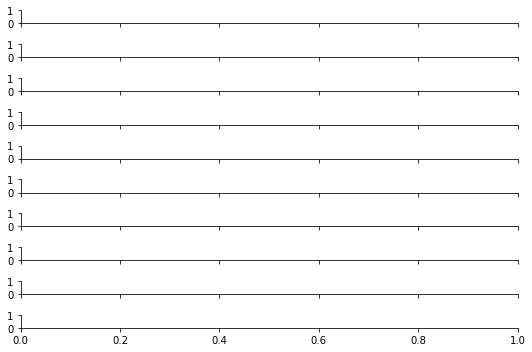

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Create the data
rs = np.random.RandomState(1979)
x = rs.randn(500)
g = np.tile(list("ABCDEFGHIJ"), 50)
df = pd.DataFrame(dict(x=x, g=g))
m = df.g.map(ord)
df["x"] += m

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)